<a href="https://colab.research.google.com/github/rohinishimpatwar/DeepLearning/blob/master/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


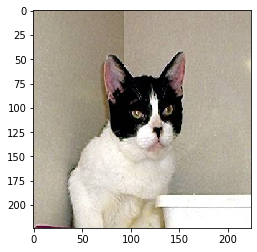

In [55]:
from keras.preprocessing import image
from matplotlib.pyplot import imshow

fnames = [os.path.join("/content/drive/My Drive/DeepLearningSem3/input/dogs-vs-cats/train/", fname) for fname in os.listdir("/content/drive/My Drive/DeepLearningSem3/input/dogs-vs-cats/train/")]
img_path = fnames[1] # Choose one image to view
img = image.load_img(img_path, target_size=(224, 224)) # load image and resize it
x = image.img_to_array(img) # Convert to a Numpy array with shape (224, 224, 3)

x = x.reshape((1,) + x.shape)

plt.imshow(image.array_to_img(x[0]))

In [47]:
from keras.applications.imagenet_utils import decode_predictions
from keras.applications import VGG16

model = VGG16(weights='imagenet', include_top=True)

features = model.predict(x)
decode_predictions(features, top=5)

[[('n03887697', 'paper_towel', 0.16612945),
  ('n02123045', 'tabby', 0.13237935),
  ('n02124075', 'Egyptian_cat', 0.08800539),
  ('n02096585', 'Boston_bull', 0.07111923),
  ('n02971356', 'carton', 0.05909851)]]

In [0]:
from keras import layers, models, optimizers


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [49]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
train_dir="/content/drive/My Drive/DeepLearningSem3/input/dogs-vs-cats/train/"
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/DeepLearningSem3/input/dogs-vs-cats/',
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

#validation_generator = test_datagen.flow_from_directory(
#    validation_dir,
#    target_size=(224, 224), # resize all images to 224 x 224
#    batch_size=50,
#    class_mode='binary')'''

Found 37500 images belonging to 2 classes.


In [54]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10, # batches in the generator are 50, so it takes 320 batches to get to 16000 images
    epochs=10)
    #validation_data=validation_generator,
    #validation_steps=90) 

Epoch 1/10
10/10 [==============================] - 143s 14s/step - loss: 5.3828 - acc: 0.5760
Epoch 2/10
10/10 [==============================] - 136s 14s/step - loss: 4.7837 - acc: 0.5720
Epoch 3/10
10/10 [==============================] - 135s 13s/step - loss: 4.5965 - acc: 0.6220
Epoch 4/10
10/10 [==============================] - 132s 13s/step - loss: 4.4436 - acc: 0.6400
Epoch 5/10
10/10 [==============================] - 135s 14s/step - loss: 4.3430 - acc: 0.6560
Epoch 6/10
10/10 [==============================] - 138s 14s/step - loss: 4.6701 - acc: 0.6120
Epoch 7/10
10/10 [==============================] - 152s 15s/step - loss: 4.9625 - acc: 0.5480
Epoch 8/10
10/10 [==============================] - 142s 14s/step - loss: 5.2944 - acc: 0.5300
Epoch 9/10
10/10 [==============================] - 141s 14s/step - loss: 4.9476 - acc: 0.5600
Epoch 10/10
 6/10 [=================>............] - ETA: 57s - loss: 4.7490 - acc: 0.5700 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 300 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/10 [=======================>......] - ETA: 45s - loss: 4.9293 - acc: 0.5575 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 239 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/10 [==============================] - 239s 24s/step - loss: 4.7600 - acc: 0.5760
